In [31]:
%load_ext autoreload
%autoreload 2

from lstcondensation.loader import default_data_module


from pathlib import Path
from gnn_tracking.training.tc import TCModule

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
def find_latest_checkpoint(log_dir: Path):
    assert log_dir.is_dir()
    if not log_dir.name == "checkpoints":
        log_dir /= "checkpoints"
    print(log_dir)
    assert log_dir.is_dir()
    checkpoints = list(log_dir.glob("*.ckpt"))
    if len(checkpoints) == 0:
        raise ValueError(f"No checkpoints found in {log_dir}")
    path = max(checkpoints, key=lambda p: p.stat().st_mtime)
    print(path)
    return path

In [33]:
log_dir = Path(
    "/home/kl5675/Documents/23/git_sync/lst-condensation-hackathon/scripts/lightning_logs/"
)

In [34]:
model = TCModule.load_from_checkpoint(
    find_latest_checkpoint(log_dir / "industrious-able-bonobo")
)

[18:02:19] DEBUG: Getting class LSGraphTCN from module lstcondensation.model
/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'hc_in' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['hc_in'])`.
  rank_zero_warn(
[18:02:19] DEBUG: Getting class PotentialLoss from module gnn_tracking.metrics.losses
[18:02:19] DEBUG: Getting class BackgroundLoss from module gnn_tracking.metrics.losses
[18:02:19] DEBUG: Getting class DBSCANHyperParamScanner from module gnn_tracking.postprocessing.dbscanscanner
[18:02:19] DEBUG: Getting class PulsedNTrials from module gnn_tracking.postprocessing.clusterscanner
[18:02:19 TM] WARNING: Background loss weight is ~0.0. You probably want to set background_loss=None to disable it completely (for speedup).


/home/kl5675/Documents/23/git_sync/lst-condensation-hackathon/scripts/lightning_logs/industrious-able-bonobo/checkpoints
/home/kl5675/Documents/23/git_sync/lst-condensation-hackathon/scripts/lightning_logs/industrious-able-bonobo/checkpoints/epoch=199-step=120000.ckpt


In [36]:
from gnn_tracking.postprocessing.dbscanscanner import DBSCANHyperParamScanner

model.cluster_scanner = DBSCANHyperParamScanner(n_jobs=12, eps_range=(0.25, 0.4))

In [38]:
from pytorch_lightning import Trainer

trainer = Trainer()
trainer.validate(model, dataloaders=default_data_module.test_dataloader())

/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3 ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[18:04:59 ClusterHP] DEBUG: Starting from params: {'eps': 0.30660970493099615, 'min_samples': 1}
[18:04:59 ClusterHP] INFO: Starting hyperparameter scan for clustering
[18:05:06 ClusterHP] DEBUG: Evaluated {'eps': 0.25765770813249744, 'min_samples': 1}: 0.6471003237018529
[18:05:06 ClusterHP] DEBUG: Evaluated {'eps': 0.30660970493099615, 'min_samples': 1}: 0.6615560606563962
[18:05:08 ClusterHP] DEBUG: Evaluated {'eps': 0.2808898899380754, 'min_samples': 1}: 0.6582338946161593
[18:05:08 ClusterHP] DEBUG: Evaluated {'eps': 0.3112260769895969, 'min_samples': 1}: 0.660614092485836
[18:05:08 ClusterHP] DEBUG: Evaluated {'eps': 0.3594340601047931, 'min_samples': 1}: 0.6557777627601127
[18:05:08 ClusterHP] DEBUG: Evaluated {'eps': 0.313157670198466, 'min_samples': 1}: 0.6614379600417521
[18:05:08 ClusterHP] DEBUG: Evaluated {'eps': 0.30143013979965505, 'min_samples': 1}: 0.660292720620944
[18:05:08 ClusterHP] DEBUG: Evaluated {'eps': 0.2793262528871371, 'min_samples': 1}: 0.6576218431930958


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Validate metric             ┃              DataLoader 0              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│             adjusted_rand              │         8.055900252657011e-05          │
│           adjusted_rand_std            │         1.923685340443626e-05          │
│         adjusted_rand_std_std          │                  nan                   │
│               attractive               │         3.389386256458238e-05          │
│             attractive_std             │         7.442597507179016e-07          │
│          attractive_weighted           │         3.389386256458238e-05          │
│        attractive_weighted_std         │         7.442597507179016e-07          │
│               background               │           0.9999993443489075           │
│             background_std             │         1.8848643534852272e-08         │
│          background_weighted           │                  0.0                   │
│        background_weighted_std         │                  0.0                   │
│            best_dbscan_eps             │           0.3066096901893616           │
│          best_dbscan_eps_std           │                  nan                   │
│        best_dbscan_min_samples         │                  1.0                   │
│      best_dbscan_min_samples_std       │                  nan                   │
│              completeness              │           0.3826916813850403           │
│            completeness_std            │          0.010474305599927902          │
│          completeness_std_std          │                  nan                   │
│            fowlkes_mallows             │          0.007495913188904524          │
│          fowlkes_mallows_std           │         0.0007999567314982414          │
│        fowlkes_mallows_std_std         │                  nan                   │
│              homogeneity               │           0.9831852316856384           │
│            homogeneity_std             │         0.0015382198616862297          │
│          homogeneity_std_std           │                  nan                   │
│               repulsive                │         1.7985443264478818e-05         │
│             repulsive_std              │         9.241098268830683e-07          │
│           repulsive_weighted           │         1.2589809557539411e-05         │
│         repulsive_weighted_std         │         6.468769129241991e-07          │
│                 total                  │         4.6483670303132385e-05         │
│               total_std                │         5.636780429085775e-07          │
│          trk.double_majority           │          0.21693214774131775           │
│       trk.double_majority_pt0.5        │           0.3432190716266632           │
│     trk.double_majority_pt0.5_std      │          0.00729081267490983           │
│   trk.double_majority_pt0.5_std_std    │                  nan                   │
│       trk.double_majority_pt0.9        │            0.66155606508255            │
│     trk.double_majority_pt0.9_std      │          0.01573667861521244           │
│   trk.double_majority_pt0.9_std_std    │                  nan                   │
│       trk.double_majority_pt1.5        │           0.7035322785377502           │
│     trk.double_majority_pt1.5_std      │          0.015935972332954407          │
│   trk.double_majority_pt1.5_std_std    │                  nan                   │
│        trk.double_majority_std         │          0.007625521160662174          │
│      trk.double_majority_std_std       │                  nan                   │
│        trk.fake_double_majority        │          0.04754026234149933           │
│     trk.fake_double_majority_pt0.5     │          0.07172971218824387           │
│   trk.fake_double_majority_pt0.5_std   │          

[{'attractive': 3.389386256458238e-05,
  'repulsive': 1.7985443264478818e-05,
  'background': 0.9999993443489075,
  'attractive_weighted': 3.389386256458238e-05,
  'repulsive_weighted': 1.2589809557539411e-05,
  'background_weighted': 0.0,
  'total': 4.6483670303132385e-05,
  'v_measure': 0.5508736968040466,
  'homogeneity': 0.9831852316856384,
  'completeness': 0.3826916813850403,
  'trk.n_particles': 4100.60009765625,
  'trk.n_cleaned_clusters': 1085.5999755859375,
  'trk.perfect': 0.05364207550883293,
  'trk.double_majority': 0.21693214774131775,
  'trk.lhc': 0.8080538511276245,
  'trk.fake_perfect': 0.21083033084869385,
  'trk.fake_double_majority': 0.04754026234149933,
  'trk.fake_lhc': 0.1919461339712143,
  'trk.n_particles_pt0.5': 2564.39990234375,
  'trk.n_cleaned_clusters_pt0.5': 1064.800048828125,
  'trk.perfect_pt0.5': 0.0850362703204155,
  'trk.double_majority_pt0.5': 0.3432190716266632,
  'trk.lhc_pt0.5': 0.8160917162895203,
  'trk.fake_perfect_pt0.5': 0.3299125134944916,


In [40]:
default_data_module.setup(stage="test")

[18:07:49] INFO: DataLoader will load 5 graphs (out of 175 available).
[18:07:49] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/processed/0170.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/processed/0174.pt


In [41]:
default_data_module.datasets["test"]

TrackingDataset(5)

In [42]:
data = default_data_module.datasets["test"][0]

In [45]:
out = model.to("cuda").forward(data.to("cuda"))

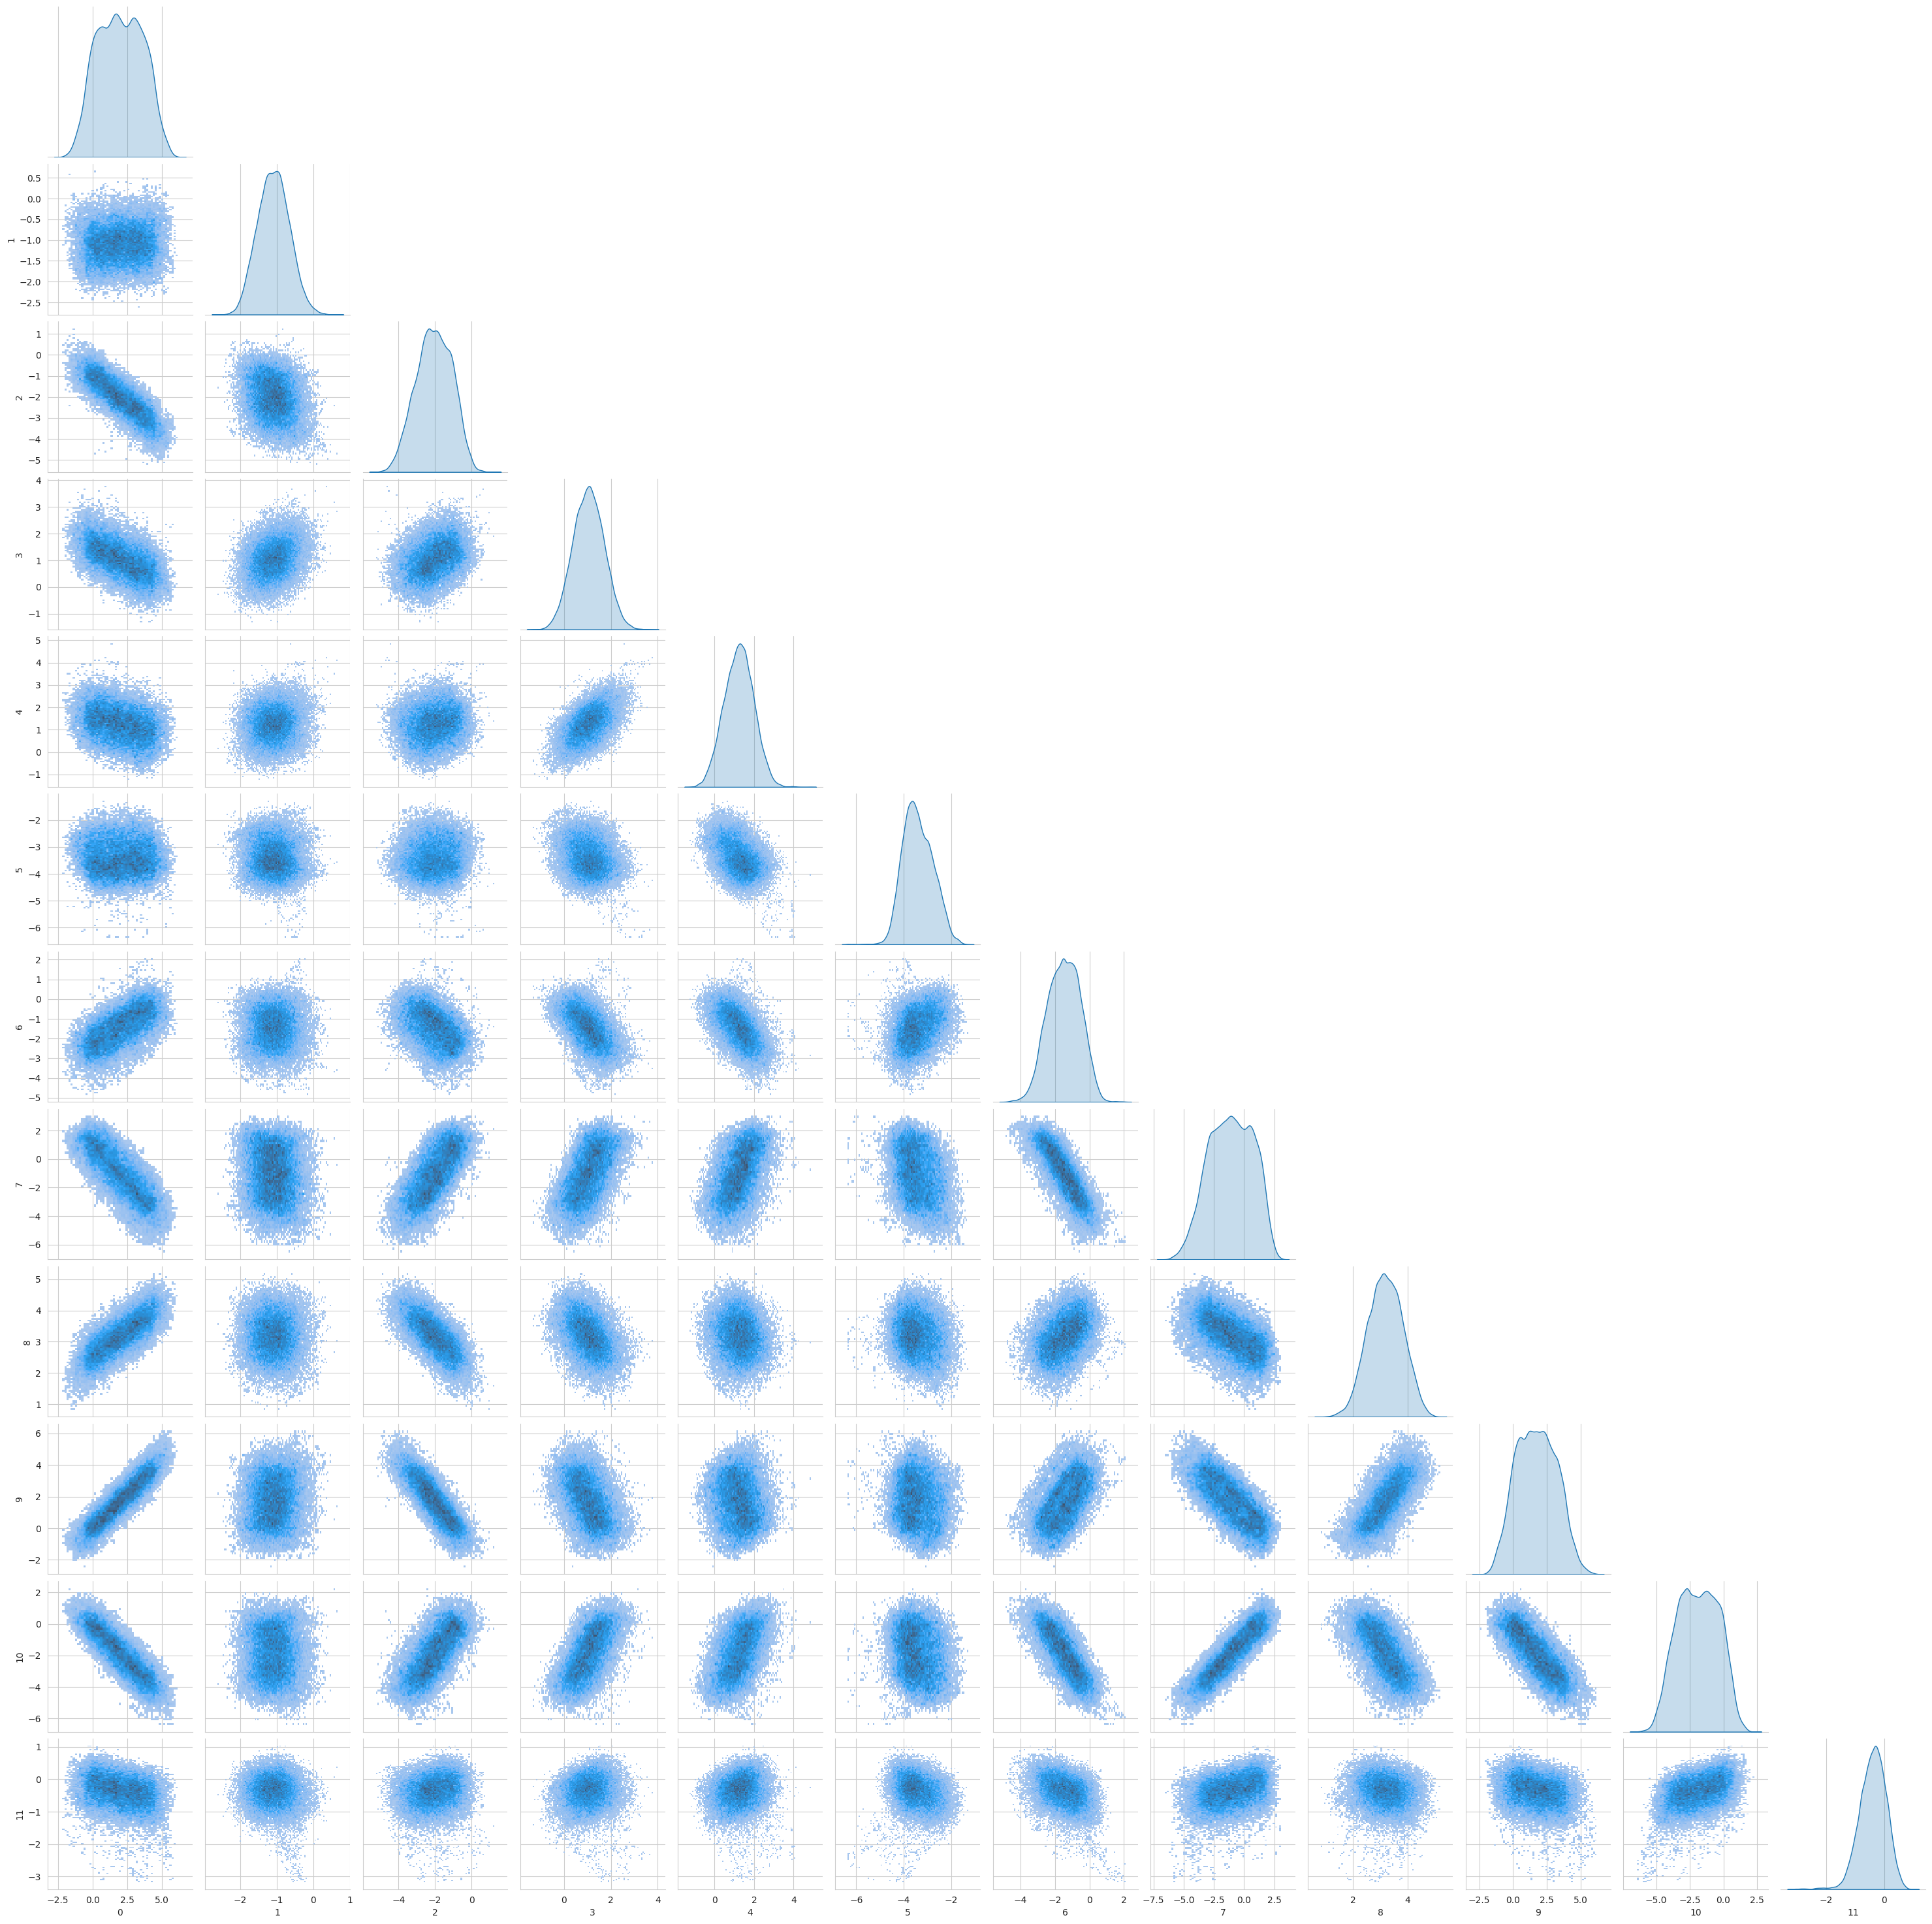

In [46]:
import seaborn as sns
import pandas as pd

sns.pairplot(
    pd.DataFrame(out["H"].detach().cpu()), corner=True, diag_kind="kde", kind="hist"
)

In [47]:
%matplotlib notebook

In [49]:
import matplotlib.pyplot as plt

x = out["H"].detach().cpu()
is_noise = data.particle_id.detach().cpu() <= 0

plt.scatter(x[is_noise, 0], x[is_noise, 1], s=1, alpha=0.5, color="r")
plt.scatter(x[~is_noise, 0], x[~is_noise, 1], s=1, alpha=0.5, color="green")

plt.show()

<IPython.core.display.Javascript object>